In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dx = pd.read_csv('Beer',encoding='utf-8')

dx = dx.drop('Unnamed: 0',axis=1)

dx.drop_duplicates(inplace=True)

dx.loc[(dx.beer.str.contains('\sIPA\s',regex=True))&(dx.group != 'IPA/PA'),'group'] = 'IPA/PA'

dx.drop_duplicates()
ask about inteview process subtly
do research and propose things
glassdoor

In [23]:
#dx.to_csv('Beer_Dataset',encoding = 'utf-8',index=False)
dx = pd.read_csv('Beer_Dataset',encoding='utf-8')

In [24]:
from surprise import SVD
from surprise import KNNBaseline as KNNB
import surprise
from surprise import Dataset
from surprise import evaluate
from surprise import Reader
from surprise import GridSearch

In [25]:
reader = Reader(rating_scale=(1, 5))
jaja = Dataset.load_from_df(dx[['username','beer_id','rating']], reader)
#jaja.split()
algo = SVD(n_epochs=10, lr_all=.005, reg_all=.3)
algo2 = KNNB()

In [26]:
perf = evaluate(algo, jaja, measures=['RMSE', 'MAE'])

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.3895
MAE:  0.2805
------------
Fold 2
RMSE: 0.3919
MAE:  0.2822
------------
Fold 3
RMSE: 0.3893
MAE:  0.2811
------------
Fold 4
RMSE: 0.3898
MAE:  0.2815
------------
Fold 5
RMSE: 0.3922
MAE:  0.2825
------------
------------
Mean RMSE: 0.3906
Mean MAE : 0.2816
------------
------------


In [27]:
dx[dx.beer=='Mango IPA'].rating.mean()

3.766000000000001

In [28]:
perf = evaluate(algo2, jaja, measures=['RMSE','MAE'])

Evaluating RMSE, MAE of algorithm KNNBaseline.

------------
Fold 1
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3523
MAE:  0.2467
------------
Fold 2
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3548
MAE:  0.2490
------------
Fold 3
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3509
MAE:  0.2462
------------
Fold 4
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3539
MAE:  0.2486
------------
Fold 5
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3541
MAE:  0.2474
------------
------------
Mean RMSE: 0.3532
Mean MAE : 0.2476
------------
------------


In [29]:
params = {'k':[10,20,30,40,50]}
Gs = GridSearch(KNNB,params)
Gs.evaluate(jaja)

[{'k': 10}, {'k': 20}, {'k': 30}, {'k': 40}, {'k': 50}]
------------
Parameters combination 1 of 5
params:  {'k': 10}
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.3480
Mean MAE : 0.2410
------------
------------
Parameters combination 2 of 5
params:  {'k': 20}
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

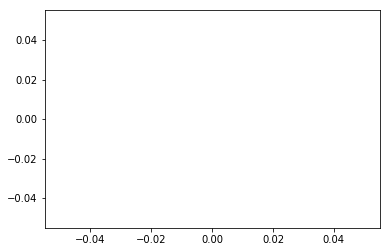

In [30]:
plt.plot(Gs.cv_results['RMSE'])
plt.show()

In [31]:
dx.head()

,beer,brewery,rDev,rating,username,beer_id,type,group
0,BBA Ye Old Battering Ram,MadTree Brewing,2.6,4.30,stonedtrippin,68664,American Barleywine,High ABV
1,BBA Ye Old Battering Ram,MadTree Brewing,-6.0,3.94,knapp85,68664,American Barleywine,High ABV
2,BBA Ye Old Battering Ram,MadTree Brewing,6.4,4.46,bluejacket74,68664,American Barleywine,High ABV
3,BBA Ye Old Battering Ram,MadTree Brewing,3.6,4.34,jzeilinger,68664,American Barleywine,High ABV
4,BBA Ye Old Battering Ram,MadTree Brewing,-13.4,3.63,somethingclever,68664,American Barleywine,High ABV


In [32]:
dx.group.value_counts().index.values

array([u'IPA/PA', u'Porter/Stout', u'Fruity/Flavored', u'Dark Ale',
       u'Wheat', u'High ABV', u'Pale Lager', u'Dark Lager',
       u'Non-Alcoholic'], dtype=object)

1. IPA/PA             172801
2. Porter/Stout       103172
3. Fruity/Flavored     87286
4. Dark Ale            58167
5. Wheat               56279
6. High ABV            52698
7. Pale Lager          36842
8. Dark Lager          36123
9. Non-Alcoholic        1389

In [33]:
#score in each position represent group score
sample = [1,5,1,5,1,2,2,4,1]

In [34]:
def Add_User_Preference(pref_vect, df):
    data = df.copy()
    grouped = data.group.value_counts().index.values
    for x in range(len(grouped)-1):
        score = data[data.group==grouped[x]].rating
        if pref_vect[x] == 1:
            data.loc[data.group==grouped[x],'rating'] = score - .5
        if pref_vect[x] == 2:
            data.loc[data.group==grouped[x],'rating'] = score - .25
        if pref_vect[x] == 4:
            data.loc[data.group==grouped[x],'rating'] = score + .25
        if pref_vect[x] == 5:
            data.loc[data.group==grouped[x],'rating'] = score + .5
        data.loc[data.rating > 5,'rating'] = 5
    return data

In [35]:
dr = Add_User_Preference(sample,dx)

In [36]:
print dx[dx.group=='Dark Ale'].rating.mean(), dr[dr.group=='Dark Ale'].rating.mean()
len(dr)

3.76182061994 4.25776832224


604757

In [37]:
#beer_list = dr[dr.brewery.str.contains('SLO Brewing Company')].beer_id.values
dr[dr.group=='IPA/PA'].rating.mean()

3.3491473258460953

In [38]:
jaja = Dataset.load_from_df(dr[['username','beer_id','rating']], reader)
jaja.split()
trainset = jaja.build_full_trainset()
algo.train(trainset)
#testset = trainset.build_testet()
#predictions = algo.test(testset)

In [39]:
def Sort_Beers(user, beer_list):
    ok = [[x,algo.predict(user, x)[3]] for x in beer_list]
    okee = pd.DataFrame(ok,columns=['beer_id','rating'])
    do = okee.groupby('beer_id').mean().sort_values('rating',ascending=False).index
    return sorted([[dr[dr.beer_id == x].rating.values[0], dr[dr.beer_id==x].beer.values[0]] for x in do])[-1::-1]

In [40]:
algo.predict('rick',8579)

Prediction(uid='rick', iid=8579, r_ui=None, est=3.7749565570687285, details={u'was_impossible': False})

In [41]:
dx.replace('SLO Brewing Company','SLO Brew',inplace=True)
dx[dx.brewery.str.contains('SLO Brewing Company')]

,beer,brewery,rDev,rating,username,beer_id,type,group


In [42]:
trial = dx[dx.brewery.values=='SLO Brewing Company'].beer_id.values
reso = Sort_Beers('stonnedtrippin', trial)

DataError: No numeric types to aggregate

In [ ]:
reso[0][0]

In [ ]:
Words = list(set(dx.brewery.values))
import nltk
import re

In [ ]:
#If you are unsure about whether a word is one word or true, try it as one word.
def Super_Lookup(entry):
    #remove stopwords
    stopwords = [' Brewing', ' Brewery',' Company',' Co.',' Tasting Room',' Pub',' &',' Craft',' Brauerei','Berkeley','Works','Co']
    brewers = Words
    for r in stopwords:
        entry = entry.replace(r,'')
        brewers = [x.replace(r,'') for x in brewers]
    
    #tokenize entry and brewers
    entry_len =  len(re.findall(r'\b\w+\b', entry))
    brewer_len = {brewers[x]:(len(re.findall(r'\b\w+\b', brewers[x])),x) for x in range(len(brewers))}
    poss = [(x, brewer_len[x][1]) for x in brewer_len.keys() if brewer_len[x][0]>=entry_len]
    #return closest match with same number of words
    f = [[nltk.edit_distance(entry,poss[x][0]),Words[poss[x][1]]] for x in range(len(poss))]
    return [sorted(f)[0][1], sorted(f)[1][1], sorted(f)[2][1]]

In [ ]:
Super_Lookup('Firestone-Walker')

In [ ]:
def Create_Pref():
    groups = ['IPAs and Pale Ales','Porters and Stouts','Fruity and Flavored Beers','Dark Ales','Wheat Beers',
              'High Alcohol Content','Pale Lager','Dark Lager','Non-Alcoholic']
    prefs = []
    
    print 'Rate the following beers groups according the following scale:'
    print '1: Strongly Dislike   2: Somewhat Dislike   3: Neutral   4: Somewhat Like  5: Love'
    for x in groups:
        prefs.append(int(raw_input(x)))
        
    return prefs

In [ ]:
def Brewery_Rec(brew, prefs, df):
    
    dk = Add_User_Preference(prefs,df)
    
    sugs = Super_Lookup(brew)
    a = sugs[0]; b = sugs[1] ; c = sugs[2]
    res = int(raw_input('If you meant {} answer 0. If you meant {} answer 1. \n If you meant {} answer 2'.format(a,b,c)))
    
    if res == 0:
        ans = a
    elif res == 1:
        ans = b
    elif res == 2:
        ans = c
    else:
        print 'error'
        
    place = dx[dx.brewery == ans].beer_id.values
    return Sort_Beers('new', place)

In [ ]:
samp = Create_Pref()

In [ ]:
Brewery_Rec('SLO', samp, dx)